# LOAN APPLICATION STATUS PREDICTION

In [1]:
from IPython.display import Image
Image(url= "https://www.mbahealthgroup.com/wp-content/uploads/2013/11/loan-application.jpg")

## Introduction

### Load Application Status Prediction is a task that can be done based on historical information of the customer and bank. By checking the dataset already existed regarding the status of the Load Application and creating a model will help us to Predict the further Loan Application Status.

### This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

### - Loan_ID

### - Gender

### - Married

### - Dependents

### - Education

### - Self_Employed

### - ApplicantIncome

### - CoapplicantIncome

### - Loan_Amount

### - Loan_Amount_Term

### - Credit History

### - Property_Area

### Target Variable:

### - Loan_Status

## Libraries

In [32]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# I have import important libraries for this project in one go so that it will save time.

In [33]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# From the dataset i can say that there are few columns in integer and few are in strings.
# I will be dripping the unwanted columns from the dataset as it is of no use.

# EDA - Exploratory Data Analysis

In [34]:
df.shape

(614, 13)

In [5]:
# There are 614 rows and 13 columns in the dataset.

In [35]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# There are null values in above columns which i will fill it soon.

In [36]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# It is a mixed dataset as 8 columns are object type ,1 columns are integers type and 4 columns are float type.
# There are missing values in few columns as count is not matching for every columns.

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(614, 13)

In [8]:
# There are no duplicates in the dataset.

In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# There are missing values in few columns as count is not matching for every columns.
# The difference between the mean and 50% is not hugh.
# There are outlires in the dataset which i will remove it soon.

## Count Plot

## Loan_Status

In [10]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

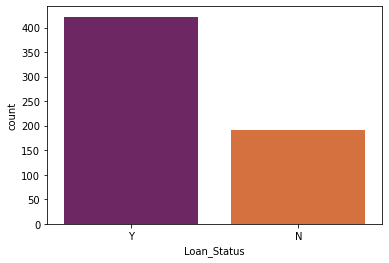

In [11]:
sns.countplot(df['Loan_Status'],palette = 'inferno',data=df);

In [1]:
# From the above count plot i can say that there are 422 loan approved and 192 disapproved.

## Gender

In [12]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

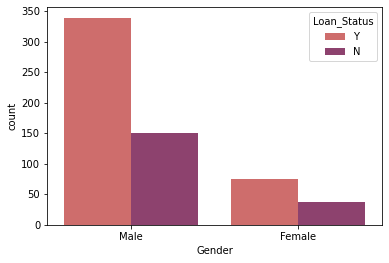

In [14]:
sns.countplot(df['Gender'],palette='flare',hue='Loan_Status',data=df);

In [2]:
# From the above count plot i can say that males required more loan than female.
# Males disapproved loan ratio is lower than female. 

## Married

In [15]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

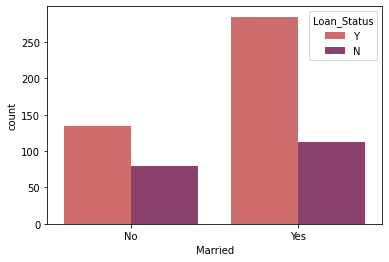

In [16]:
sns.countplot(df['Married'],palette='flare',hue='Loan_Status',data=df);

In [3]:
# Married people are high in numbers than unmarried people in terms of applying loan.
# Loan rejection is also high in terms of married people.

## Dependents

In [74]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

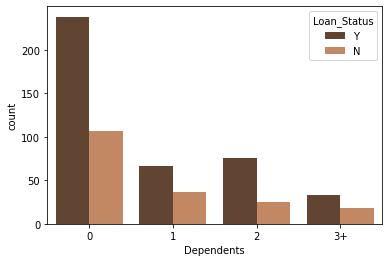

In [18]:
sns.countplot(df['Dependents'],palette='copper',hue='Loan_Status',data=df);

In [4]:
# Loan requirement is high for 0 dependents.

## Education

In [19]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

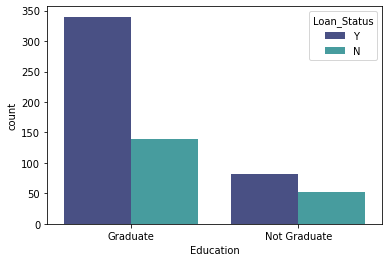

In [20]:
sns.countplot(df['Education'],palette='mako',hue='Loan_Status',data=df);

In [5]:
# Graduate are high in numbers in terms of loan application.

## Self_Employed

In [78]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

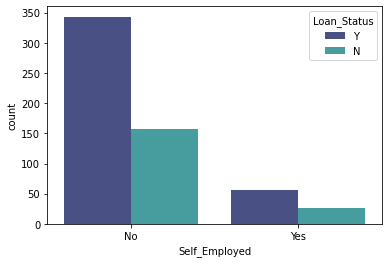

In [79]:
sns.countplot(df['Self_Employed'],palette='mako',hue='Loan_Status',data=df);

In [6]:
# From the above graph i can say that self employed people doesn't required loan as compared to salaried people.

## strip Plot

## Loan_Amount_Term

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

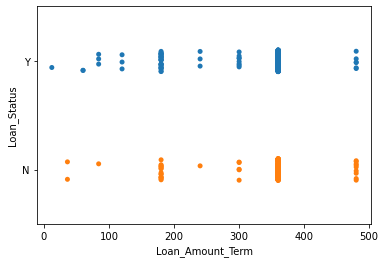

In [23]:
sns.stripplot(df['Loan_Amount_Term'],df['Loan_Status'])

In [7]:
# The above strip plot give me an idea that those people who are taking loan for short period there rejection chance is high.

## Box Plot

## Credit_History

In [24]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

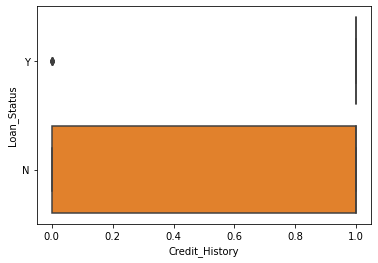

In [25]:
sns.boxplot(df['Credit_History'],df['Loan_Status'])

In [8]:
# Credit history play vital role in loan approval.
# Poeple whose credit history is not good there loan application is getting disapproved.

## Property_Area

In [84]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

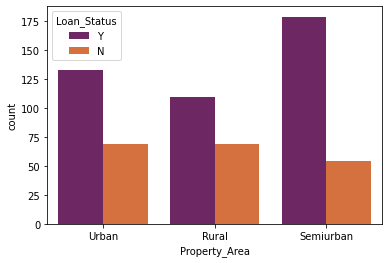

In [85]:
sns.countplot(df['Property_Area'],palette='inferno',hue='Loan_Status',data=df);

In [9]:
# Semi Urban people are high in numbers in terms of applying loan and there rejection chance is also low.

# Catplot

## ApplicantIncome

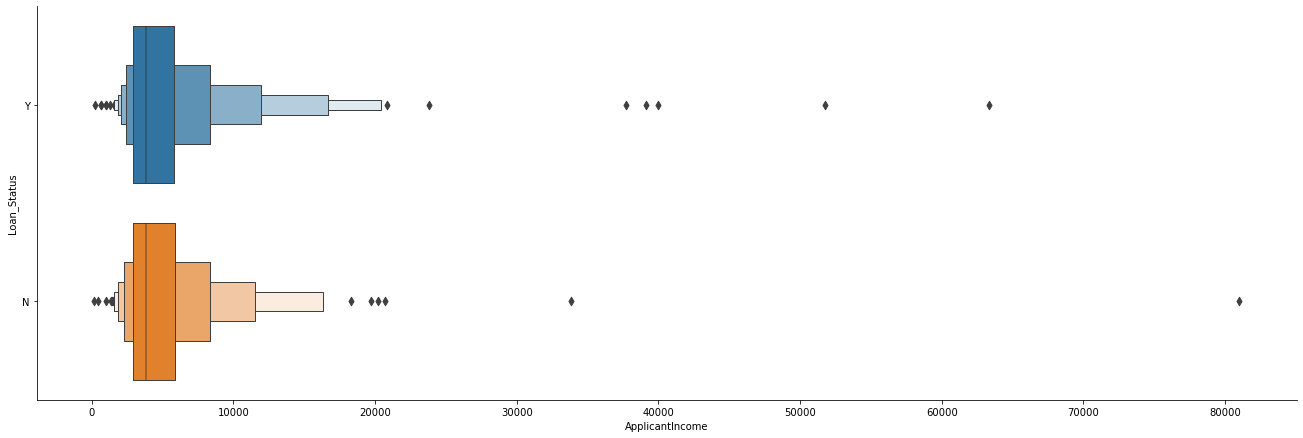

In [86]:
sns.catplot(y="Loan_Status",x="ApplicantIncome",data=df.sort_values("Loan_Status",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [10]:
# The above plot indicate that people whose earning is approx 20000 are high in numbers in terms of applying loan.

## CoapplicantIncome

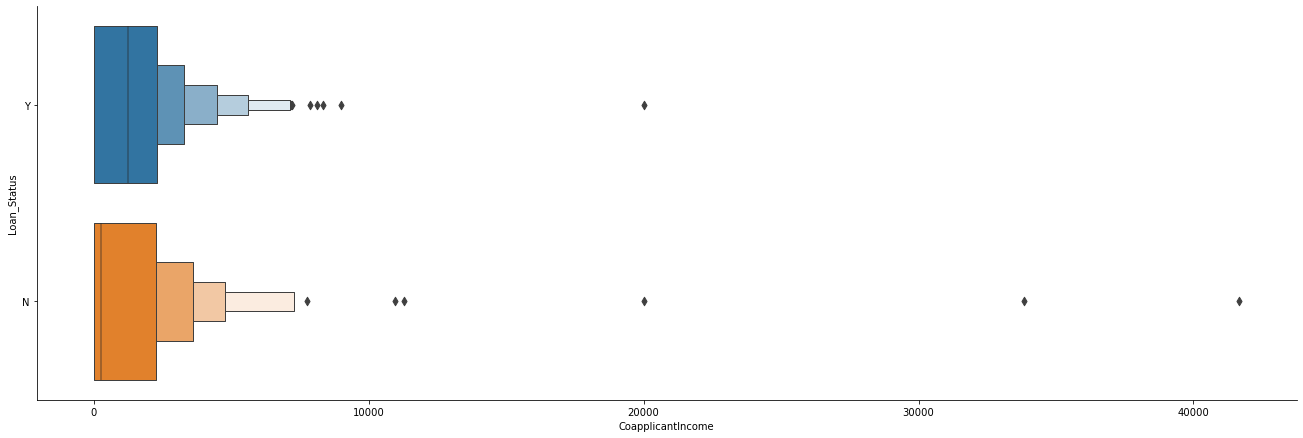

In [87]:
sns.catplot(y="Loan_Status",x="CoapplicantIncome",data=df.sort_values("Loan_Status",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [11]:
# People whose coapplicant income is between 0 to 10000 are the once who requried loan the most.

## LoanAmount

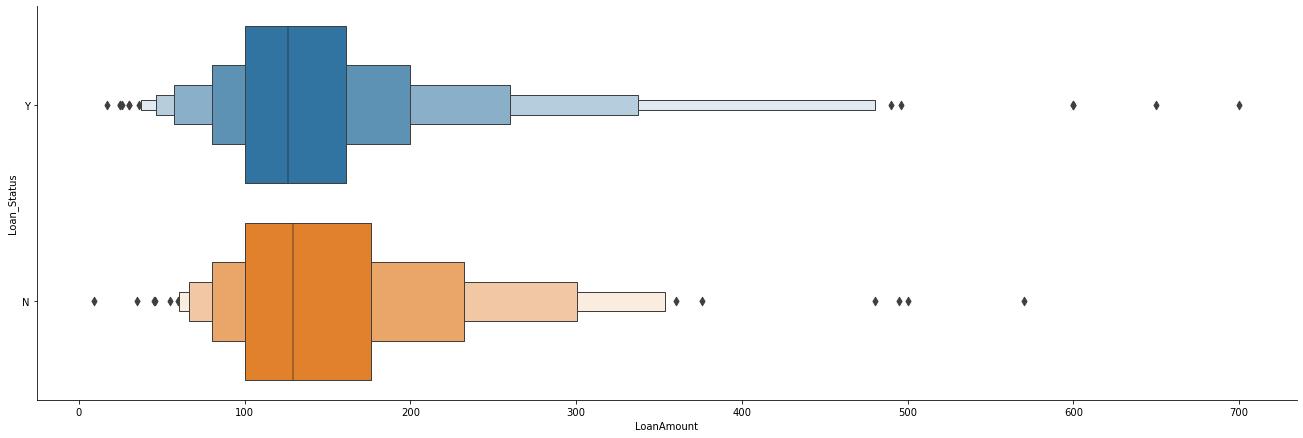

In [88]:
sns.catplot(y="Loan_Status",x="LoanAmount",data=df.sort_values("Loan_Status",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [12]:
# Those who have applied for big amount there loan approval chance is high.

## Scatter Plot

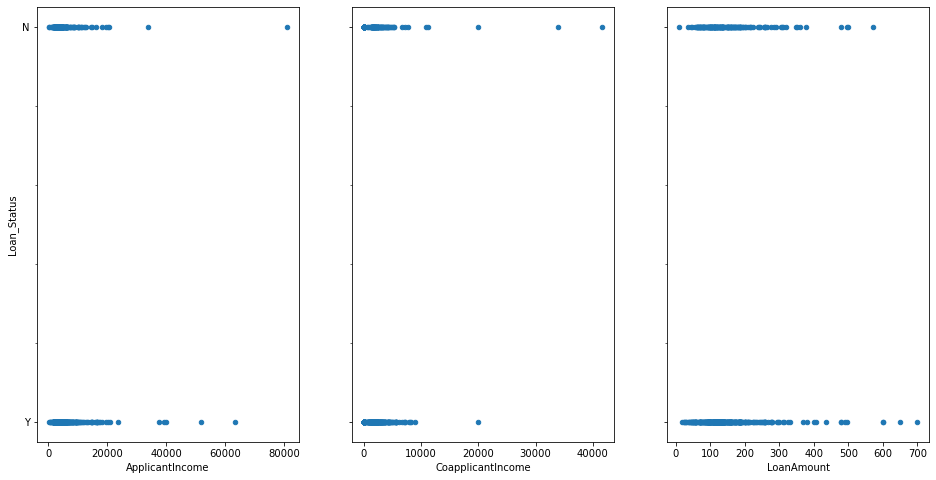

In [89]:
fig,axs = plt.subplots(1,3,sharey = True)
df.plot(kind='scatter',x='ApplicantIncome',y='Loan_Status',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='CoapplicantIncome',y='Loan_Status',ax=axs[1])
df.plot(kind='scatter',x='LoanAmount',y='Loan_Status',ax=axs[2])
fig.savefig('testdata.jpg')

In [13]:
# The loan status is positively correlated with ApplicantIncome,CoapplicantIncome and LoanAmount.

In [40]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [15]:
# There are few columns which are categorical in nature and few columns are continous in nature.

## Filling the missing values

In [41]:
# filling the missing values of categorical columns
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# filling the missing values of continious columns
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [42]:
# There were few missing values in above columns which i replaced it with the help of mean and mode.

In [43]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
# Now there is no missing values in any of the columns.

## Replacing categorial columns into numerical values

In [45]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Loan_Status':{'N':0,'Y':1},'Dependents':{0:0,1:1,2:2,'3+':3}},inplace=True)

In [18]:
# I have convert few string columns into integers so that model building will be easy to do.

In [46]:
df.drop('Loan_ID',inplace=True,axis=1)

In [19]:
# I have drop loan id column as it is of no use.

## Distribution Plot

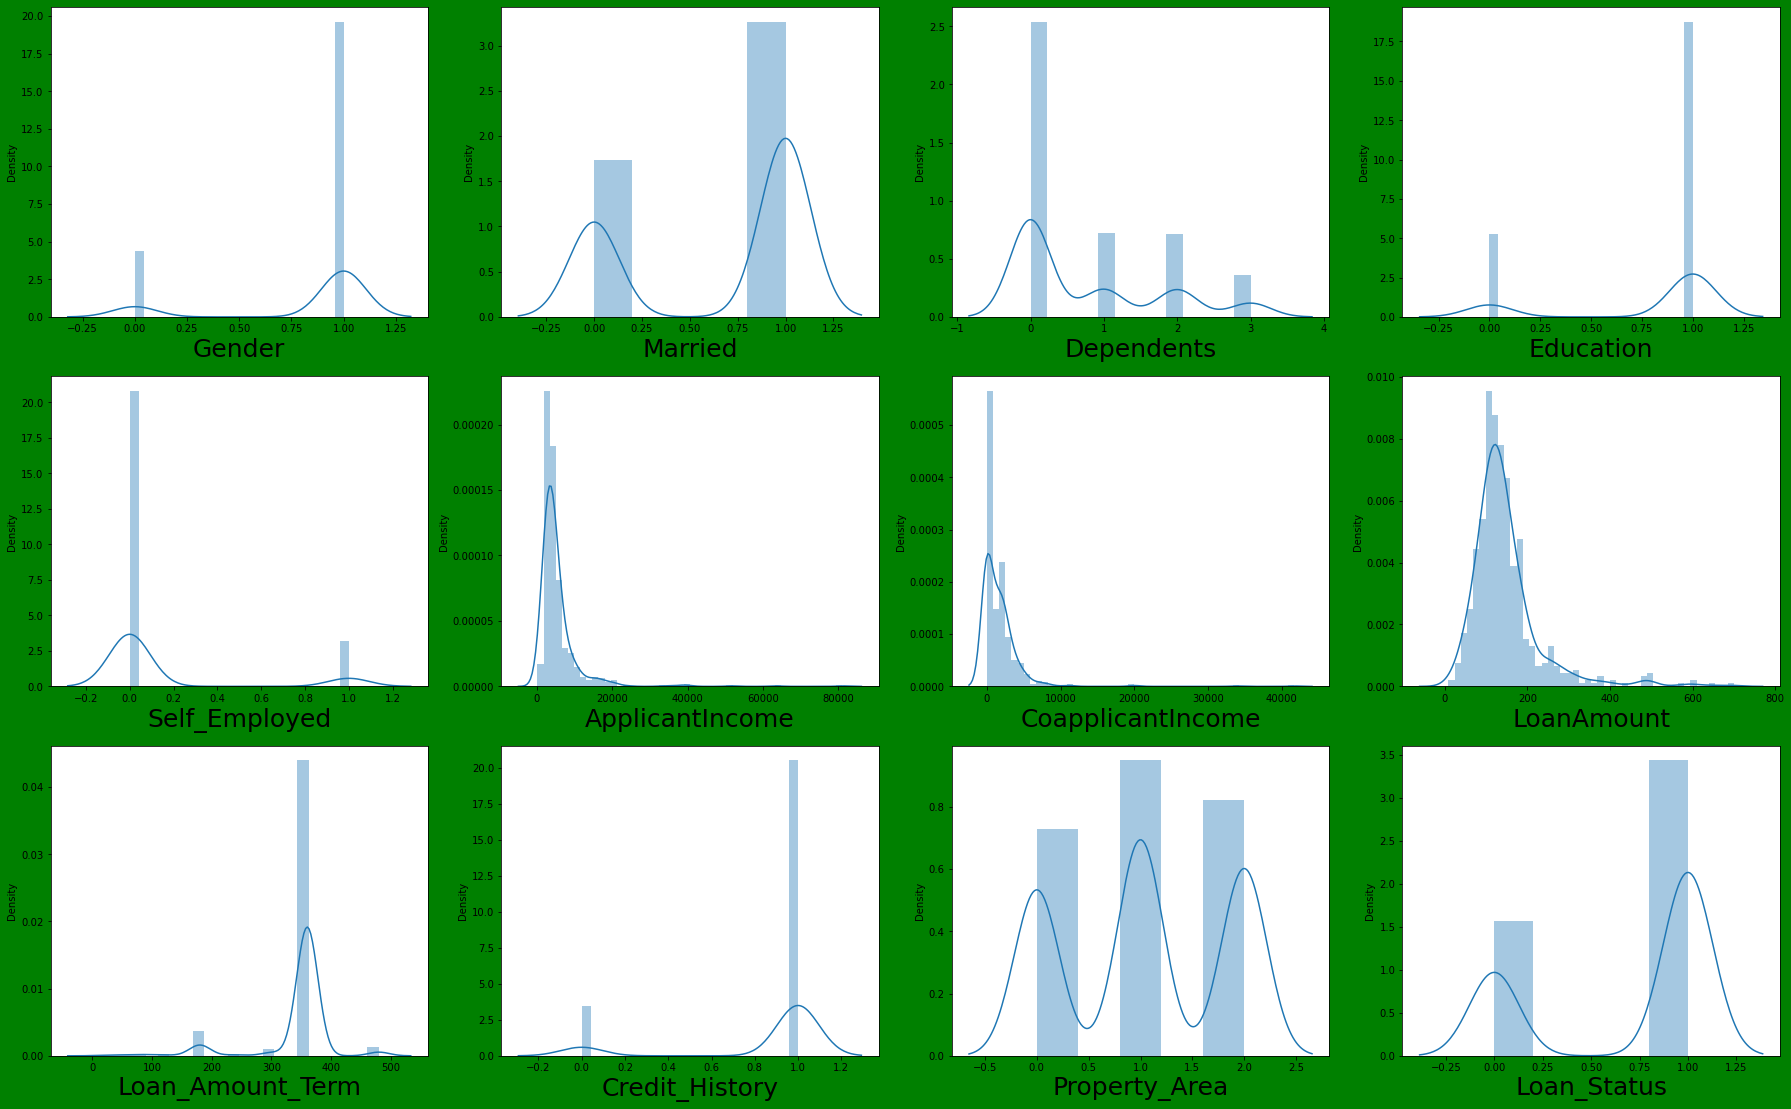

In [96]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='green')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

In [20]:
# There are skewness in the dataset which i will remove soon.
# There are few zero values as well that also need to be taken care.

## Replacing all the zero values from different columns

In [47]:
# Replacing categorial columns with mode
df['Self_Employed']=df['Self_Employed'].replace(0,df['Self_Employed'].mode()[0])
df['Property_Area']=df['Property_Area'].replace(0,df['Property_Area'].mode()[0])

# Replacing continous columns with mean
df['CoapplicantIncome'] = df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].mean())

In [21]:
# In Self_Employed,Property_Area and CoapplicantIncome there are few zero values that got replaced with the help of mean.

## Box Plot

Gender                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Education             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Self_Employed         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
ApplicantIncome         AxesSubplot(0.125,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
LoanAmount           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Loan_Amount_Term     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Credit_History          AxesSubplot(0.125,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Loan_Status          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

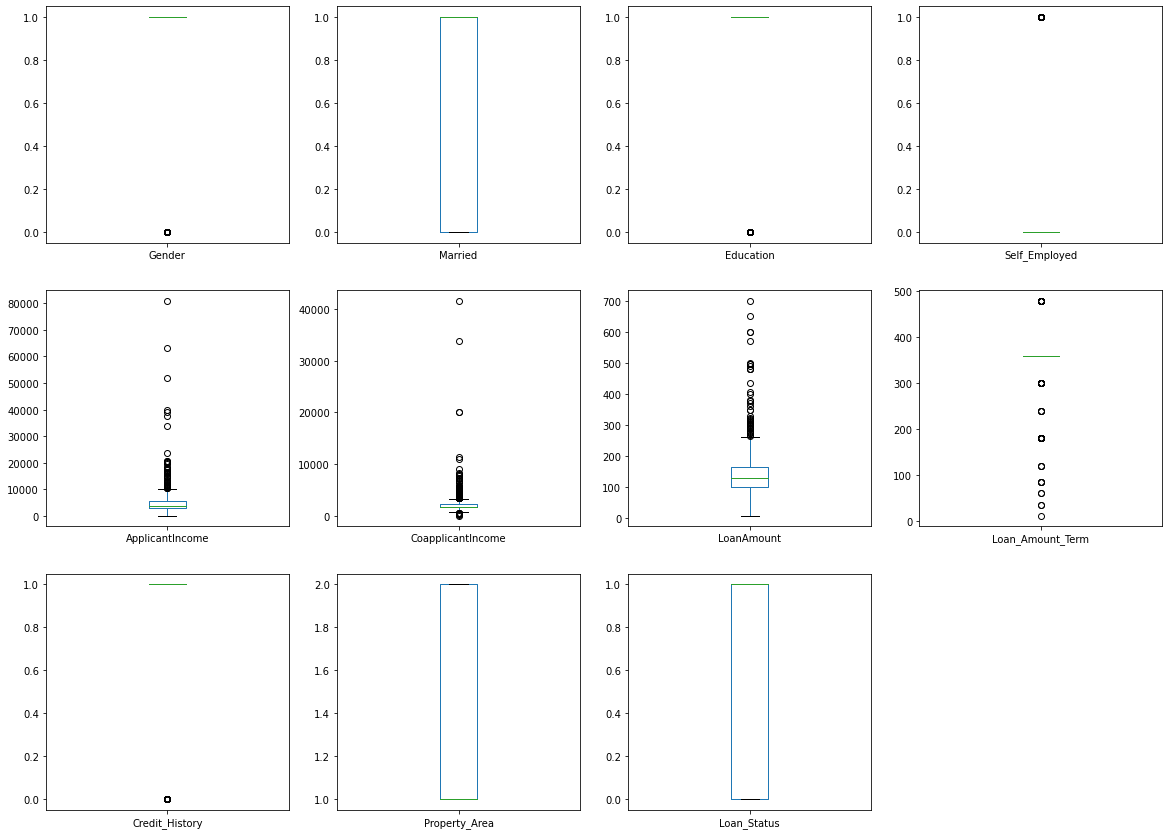

In [98]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

In [22]:
# There are outliers in the dataset that i will remove it with the help of z score.

## Z Score

In [48]:
z_score = zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.814941,0.650255,0.772496,0.129032,4649.770798,2125.815511,135.351558,342.478778,0.853990,1.329372,0.691002
std,0.388676,0.477295,0.419577,0.335521,2944.018096,1169.457218,56.320095,64.398591,0.353417,0.470385,0.462473
min,0.000000,0.000000,0.000000,0.000000,150.000000,16.120001,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2873.000000,1621.245798,100.000000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3750.000000,1621.245798,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5503.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


In [49]:
df.shape

(589, 12)

In [23]:
# I have applied z score to clean the dataset so that outliers will be removed and model accuracy can be improved.

## Visualize the correlation

In [50]:
# find correlation of features vs target using corrwith

df.drop('Loan_Status',axis=1).corrwith(df.Loan_Status)

Gender               0.021942
Married              0.095124
Education            0.092852
Self_Employed       -0.016617
ApplicantIncome     -0.005043
CoapplicantIncome    0.000764
LoanAmount          -0.042738
Loan_Amount_Term    -0.023119
Credit_History       0.555908
Property_Area       -0.039514
dtype: float64

## correlation

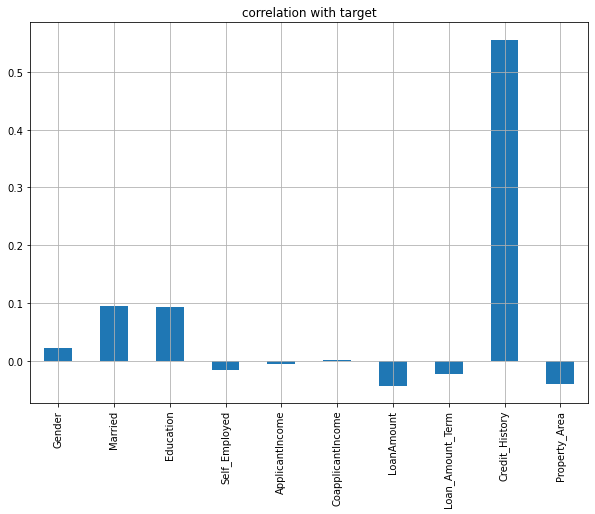

In [51]:
df.drop('Loan_Status',axis=1).corrwith(df.Loan_Status).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

In [24]:
# The above plot gives me an clear idea that few columns are positively correlated and few are negatively correlated with label.
# However i will use all the columns for model prediction.

# Machine Learning

In [52]:
x = df.drop('Loan_Status',axis=1)
y = df.Loan_Status

In [53]:
# I have divided dataset into feature and label.

## StandardScaler

In [54]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.47653262, -1.36353339, -0.72840172, ...,  0.27230588,
         0.41349021,  1.42691362],
       [ 0.47653262,  0.73338872,  0.27634913, ...,  0.27230588,
         0.41349021, -0.70081327],
       [ 0.47653262,  0.73338872, -0.72840172, ...,  0.27230588,
         0.41349021,  1.42691362],
       ...,
       [ 0.47653262,  0.73338872,  0.27634913, ...,  0.27230588,
         0.41349021,  1.42691362],
       [ 0.47653262,  0.73338872,  1.28109999, ...,  0.27230588,
         0.41349021,  1.42691362],
       [-2.09849225, -1.36353339, -0.72840172, ...,  0.27230588,
        -2.41843694, -0.70081327]])

In [55]:
# Standard scaler is basically scaling the date in one range so that it will be easy for Model building.

## VIF - variance inflation factor

In [56]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.194146,Gender
1,1.298379,Married
2,1.174280,Dependents
3,1.070140,Education
4,1.075988,Self_Employed
5,1.468050,ApplicantIncome
6,1.292538,CoapplicantIncome
7,1.638362,LoanAmount
8,1.065707,Loan_Amount_Term
9,1.010630,Credit_History


In [27]:
# VIF is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# Multicollinearity is a phenomenon when two or more independent variables are highly intercorrelated.
# From the above stats i can say that none of the features are highly intercorrelated it means Multicollinearity doesn't exist.

## Model Building

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

In [28]:
# For model prediction i am dividing the dataset into 2 parts.
# One part is used for training purpose i.e 75% dataset.
# other part is used for testing purpose i.e 25% dataset.

## Logistic Regression

In [91]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [92]:
y_pred = log_reg.predict(x_test)

In [93]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[25, 24],
       [ 4, 95]], dtype=int64)

In [94]:
log_reg.score(x_test,y_test)

0.8108108108108109

In [95]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.51      0.64        49
           1       0.80      0.96      0.87        99

    accuracy                           0.81       148
   macro avg       0.83      0.73      0.76       148
weighted avg       0.82      0.81      0.80       148



In [96]:
# Logistic Regression accuracy score 81%

### Auc Score

In [97]:
roc_auc_score(y_test,log_reg.predict(x_test))

0.7349000206143064

## KNN

### Using SelectKBest Method for best features selection

In [58]:
best_features = SelectKBest(score_func=f_classif,k=9)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate Dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(9,'Score'))

       Features_Name       Score
9     Credit_History  262.535101
1            Married    5.359961
3          Education    5.104883
7         LoanAmount    1.074146
10     Property_Area    0.917930
8   Loan_Amount_Term    0.313910
0             Gender    0.282758
2         Dependents    0.282620
4      Self_Employed    0.162130


In [59]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [60]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[24, 25],
       [11, 88]], dtype=int64)

In [61]:
knn.score(x_test,y_test)

0.7567567567567568

In [62]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.69      0.49      0.57        49
           1       0.78      0.89      0.83        99

    accuracy                           0.76       148
   macro avg       0.73      0.69      0.70       148
weighted avg       0.75      0.76      0.74       148



## Let use Grid search CV for the best parameter to improve the accuracy

In [63]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [64]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [65]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [66]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [67]:
# we will use the best parameters in our knn algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=7)

In [68]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [69]:
y_pred = knn.predict(x_test)

In [70]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[24, 25],
       [ 6, 93]], dtype=int64)

In [71]:
knn.score(x_test,y_test)

0.7905405405405406

In [72]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.49      0.61        49
           1       0.79      0.94      0.86        99

    accuracy                           0.79       148
   macro avg       0.79      0.71      0.73       148
weighted avg       0.79      0.79      0.77       148



In [73]:
# In KNN algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving the accuracy score by 3%.
# KNN Accuracy Score 79%.

### Auc Score

In [74]:
roc_auc_score(y_test,knn.predict(x_test))

0.7145949288806432

## RandomForestClassifier

In [77]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [78]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[27, 22],
       [ 9, 90]], dtype=int64)

In [79]:
rfc.score(x_test,y_test)

0.7905405405405406

In [80]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.75      0.55      0.64        49
           1       0.80      0.91      0.85        99

    accuracy                           0.79       148
   macro avg       0.78      0.73      0.74       148
weighted avg       0.79      0.79      0.78       148



## Let use Grid search CV for the best parameter to improve the accuracy

In [81]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [82]:
rfc = grd.best_estimator_

In [83]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=13)

In [84]:
y_pred = rfc.predict(x_test)

In [85]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[26, 23],
       [ 4, 95]], dtype=int64)

In [86]:
rfc.score(x_test,y_test)

0.8175675675675675

In [87]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66        49
           1       0.81      0.96      0.88        99

    accuracy                           0.82       148
   macro avg       0.84      0.75      0.77       148
weighted avg       0.83      0.82      0.80       148



In [88]:
# In Random forest algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving the accuracy score by 3%.
# Random forest Accuracy Score 82%.

### AUC Score

In [90]:
roc_auc_score(y_test,rfc.predict(x_test))

0.7451041022469593

## Decision Tree Classifier

In [98]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [99]:
y_pred = log_reg.predict(x_test)

In [100]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[25, 24],
       [ 4, 95]], dtype=int64)

In [101]:
dtc.score(x_test,y_test)

0.7162162162162162

In [102]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.51      0.64        49
           1       0.80      0.96      0.87        99

    accuracy                           0.81       148
   macro avg       0.83      0.73      0.76       148
weighted avg       0.82      0.81      0.80       148



## Let use Grid search CV for the best parameter to improve the accuracy

In [103]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [104]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [106]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [107]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=9,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=9)

In [108]:
y_pred = dtc.predict(x_test)

In [109]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[25, 24],
       [ 4, 95]], dtype=int64)

In [110]:
dtc.score(x_test,y_test)

0.8108108108108109

In [111]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.51      0.64        49
           1       0.80      0.96      0.87        99

    accuracy                           0.81       148
   macro avg       0.83      0.73      0.76       148
weighted avg       0.82      0.81      0.80       148



In [116]:
# In Decision Tree Classifier algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is neither improving nor reducing the accuracy score.
# Decision Tree Classifier Score 81%.

### Auc Score

In [112]:
roc_auc_score(y_test,dtc.predict(x_test))

0.7349000206143064

## Roc_Auc Curve 

In [117]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/ZlGz9Nl5irs/maxresdefault.jpg")

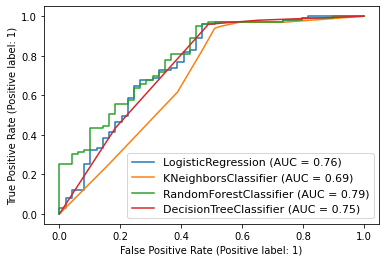

In [113]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

## Saving the best model

In [114]:
import pickle

In [115]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [119]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/ajTc5y3OqSQ/hqdefault.jpg")

In [120]:
# The best model is Random Forest classifier whose accuracy score is 82%